In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
LED=pd.read_csv("Life Expectancy Data.csv")

#LED.drop('Unnamed: 0', axis=1, inplace=True)
LED.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
LED.dropna()
aggregation_functions = {
    'Status': 'first',
    'Life expectancy ': 'mean',
    'Adult Mortality': 'mean',
    'infant deaths': 'sum',
    'Alcohol': 'mean',
    'percentage expenditure': 'mean',
    'Hepatitis B': 'mean',
    'Measles ': 'sum',
    ' BMI ': 'mean',
    'under-five deaths ': 'sum',
    'Polio': 'mean',
    'Total expenditure': 'mean',
    'Diphtheria ': 'mean',
    ' HIV/AIDS': 'mean',
    'GDP': 'mean',
    'Population': 'mean',
    ' thinness  1-19 years': 'mean',
    ' thinness 5-9 years': 'mean',
    'Income composition of resources': 'mean',
    'Schooling': 'mean'
}
aggregated_data = LED.groupby('Country').agg(aggregation_functions).reset_index()
aggregated_data.head()
aggregated_data.dropna()
aggregated_data.to_csv('LED1.csv')
#write.csv(aggregated_data, "LED1.csv")
#with open('LED1.csv', 'w') as f:
    #f.write(aggregated_data)

In [4]:
LED1=pd.read_csv("LED1.csv")
LED1 = LED1.drop(columns=['Unnamed: 0'])
LED1.dropna()
LED1.head()


,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,58.19375,269.0625,1252,0.014375,34.960110,64.562500,37796,15.51875,...,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,Albania,Developing,75.15625,45.0625,11,4.848750,193.259091,98.000000,854,49.06875,...,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,Algeria,Developing,73.61875,108.1875,325,0.406667,236.185241,78.000000,31102,48.74375,...,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,Angola,Developing,49.01875,328.5625,1340,5.740667,102.100268,70.222222,56981,18.01875,...,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,Antigua and Barbuda,Developing,75.05625,127.5000,0,7.949333,1001.585226,98.266667,0,38.42500,...,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


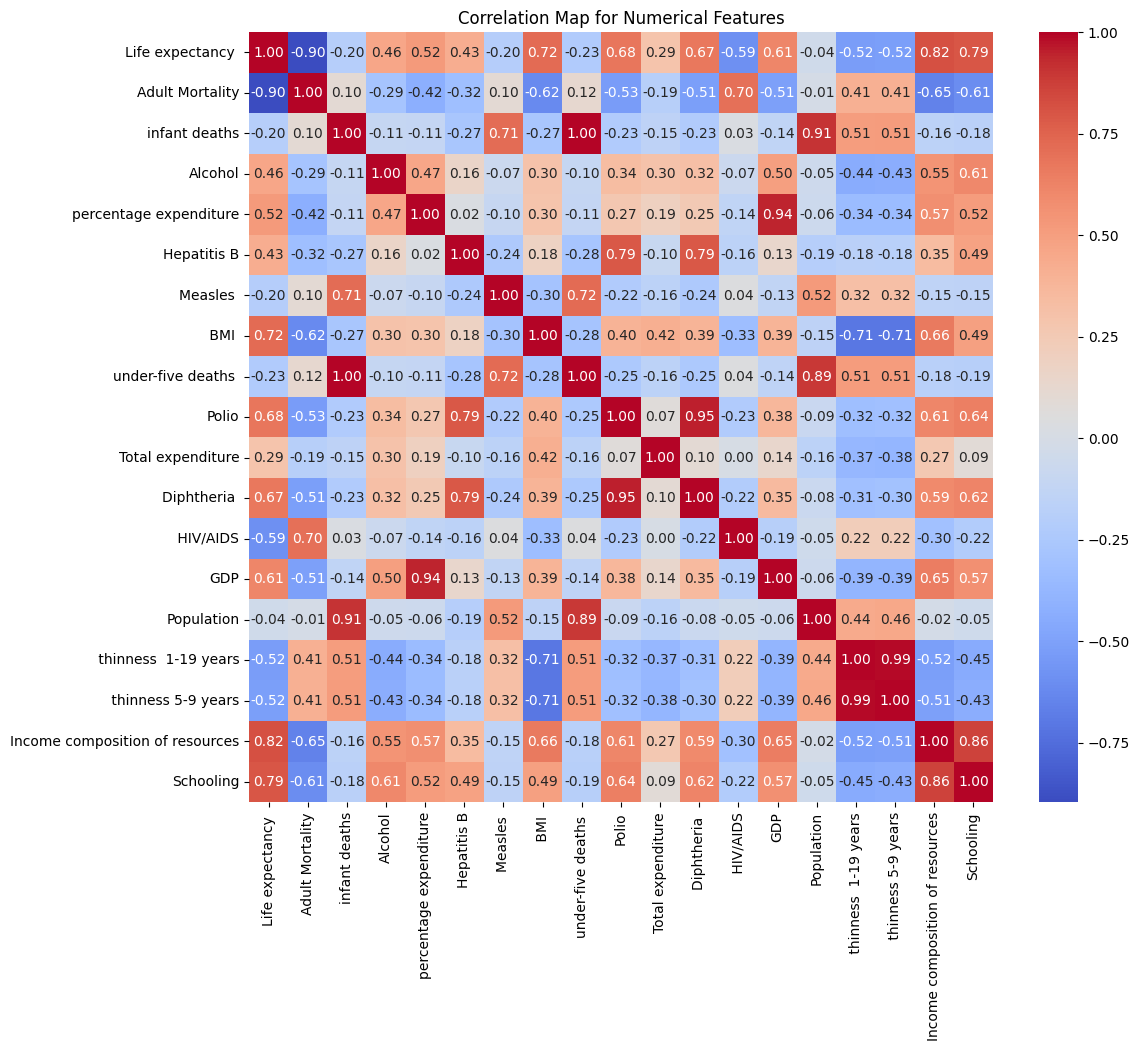

In [5]:
numerical_df = LED1.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map for Numerical Features')
plt.show()

In [6]:
# Define the list of columns you want to keep
selected_features = [
    'Life expectancy ',  # Ensure no extra spaces at the end
    'Adult Mortality',  # As is, if this matches the DataFrame
    'Diphtheria ',       # Ensure no extra spaces at the end
    ' HIV/AIDS',         # Ensure no leading space
    'Income composition of resources',  # As is
    'Schooling'         # As is
]

# Select these columns from the DataFrame
new_df = LED1[selected_features]


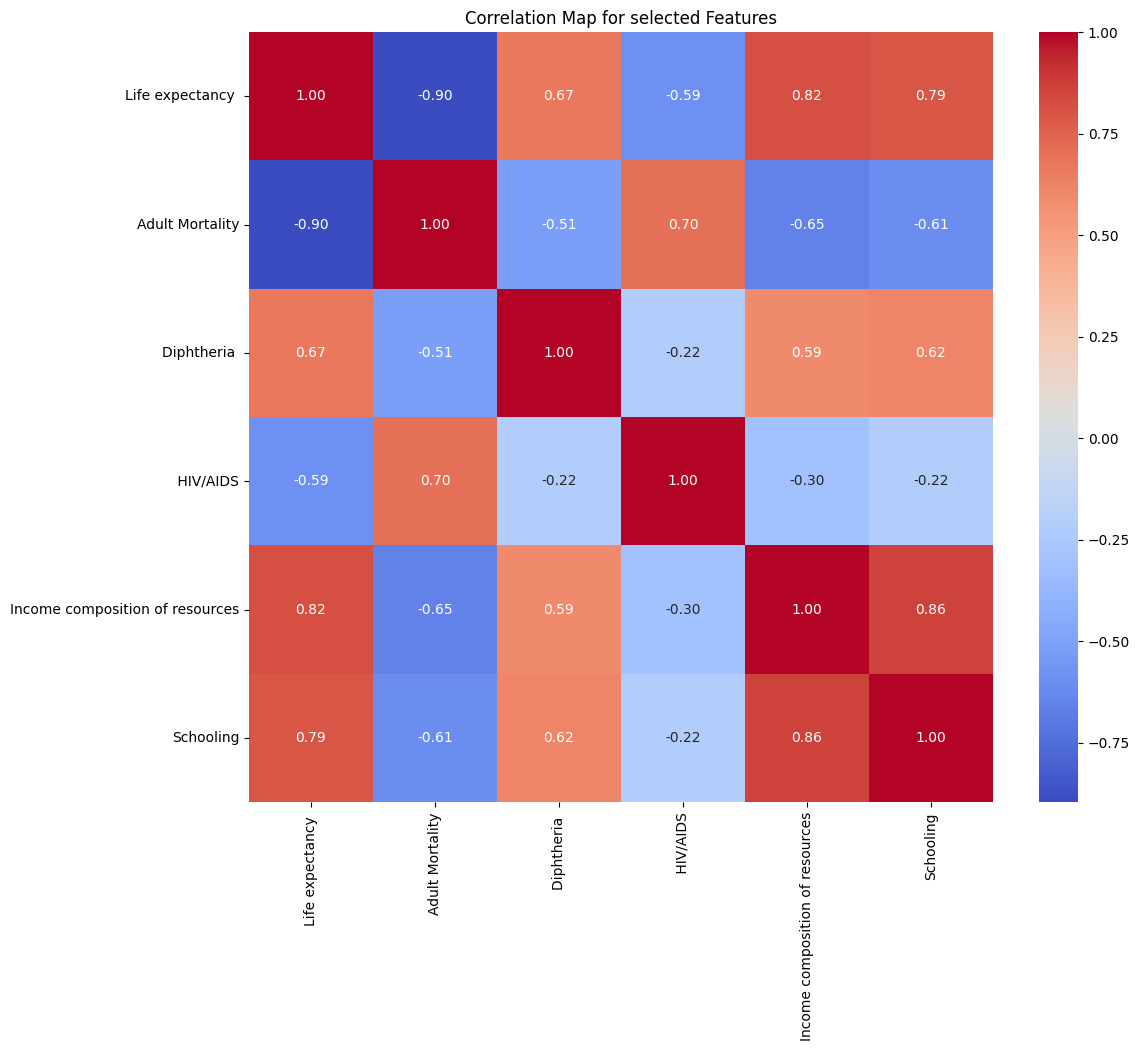

In [7]:
correlation_matrix = new_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map for selected Features')
plt.show()

In [8]:
selected_features1 = [
    'Life expectancy ',  # Ensure no extra spaces at the end
    'Adult Mortality',  # As is, if this matches the DataFrame
    'Diphtheria ',       # Ensure no extra spaces at the end
    ' HIV/AIDS',         # Ensure no leading space
    'Schooling'
]

# Select these columns from the DataFrame
new_df1 = LED1[selected_features1]

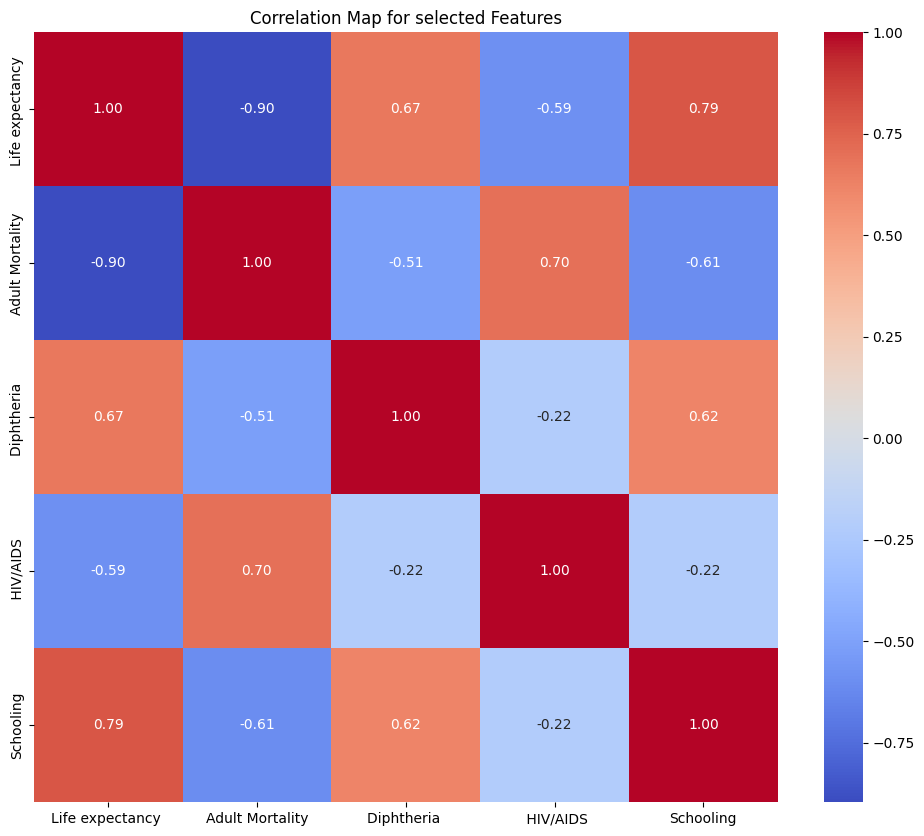

In [9]:
correlation_matrix1 = new_df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map for selected Features')
plt.show()

In [10]:
selected_features2 = [
    'Life expectancy ',  # Ensure no extra spaces at the end
    'Adult Mortality',  # As is, if this matches the DataFrame
    'Diphtheria ',       # Ensure no extra spaces at the end
    'Schooling'
]

# Select these columns from the DataFrame
new_df2 = LED1[selected_features2]

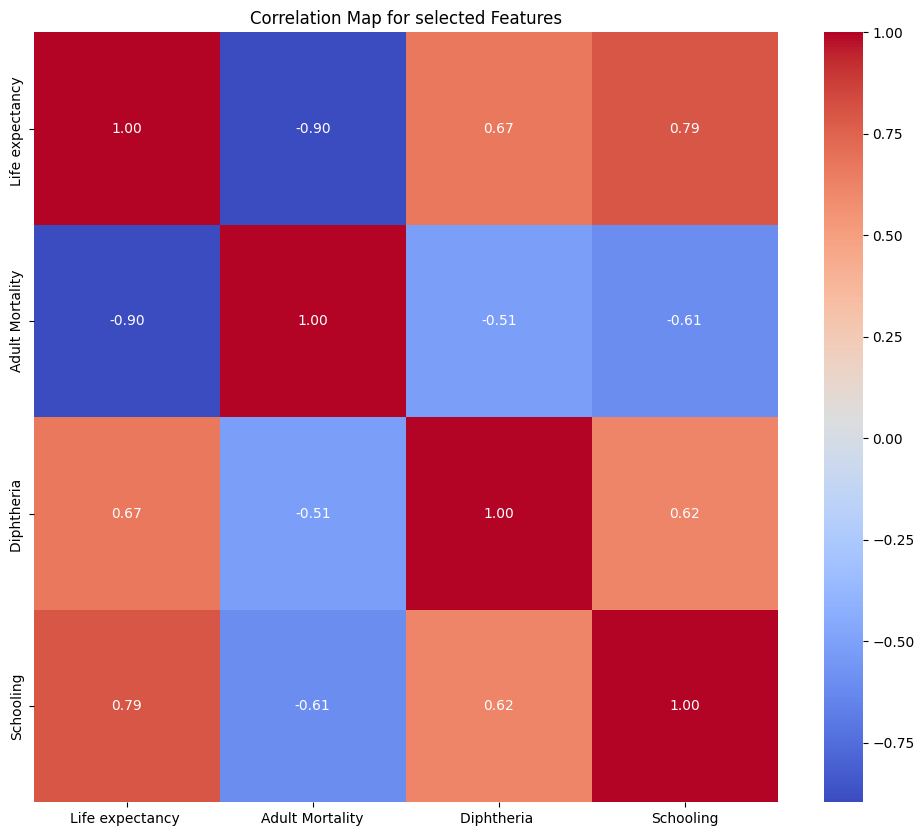

In [11]:
correlation_matrix2 = new_df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map for selected Features')
plt.show()

In [13]:
numeric_df = LED1.drop(columns=['Country', 'Status'])
numeric_df = numeric_df.dropna()
scaler = StandardScaler()

scaled_data = scaler.fit_transform(numeric_df)
pca = PCA()
pca.fit(scaled_data)
principal_components = pca.transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, len(numeric_df.columns) + 1)])
#final_df = pd.concat([LED1[['Country', 'Status']], principal_df], axis=1)
final_df = pd.concat([LED1[['Country', 'Status']].iloc[numeric_df.index], principal_df], axis=1)
